In [57]:
import cv2
img = cv2.imread("LENNA.bmp", 0)     # type: np.ndarray

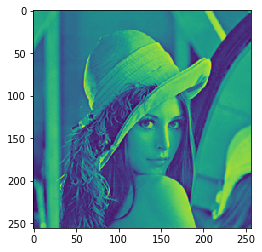

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

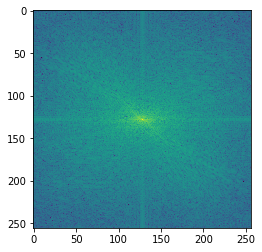

In [59]:
import numpy as np
img_dft = np.fft.fftshift(img)
img_dft = np.fft.fft2(img_dft)
img_dft = np.fft.fftshift(img_dft)
plt.imshow(np.log10(np.abs(img_dft)))

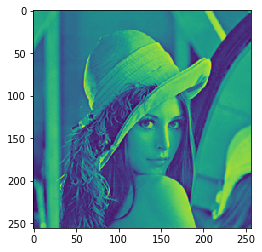

In [60]:
img_idft = np.fft.fftshift(img_dft)
img_idft = np.fft.ifft2(img_idft)
img_idft = np.fft.fftshift(img_idft)
plt.imshow(np.abs(img_idft))

In [61]:
N = 256
x_indice = np.linspace(start=-N//2,stop=N//2-1,num=N)
y_indice = x_indice
grid_x, grid_y = np.meshgrid(x_indice, y_indice)
rad_square = np.square(grid_x) + np.square(grid_y)
rad_square

array([[32768., 32513., 32260., ..., 32009., 32260., 32513.],
       [32513., 32258., 32005., ..., 31754., 32005., 32258.],
       [32260., 32005., 31752., ..., 31501., 31752., 32005.],
       ...,
       [32009., 31754., 31501., ..., 31250., 31501., 31754.],
       [32260., 32005., 31752., ..., 31501., 31752., 32005.],
       [32513., 32258., 32005., ..., 31754., 32005., 32258.]])

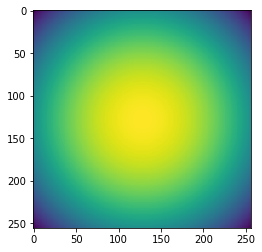

In [62]:
sigma = N/10
gauss_2d = np.exp(-rad_square/(2.0*sigma**2))
plt.imshow(np.log10(gauss_2d))

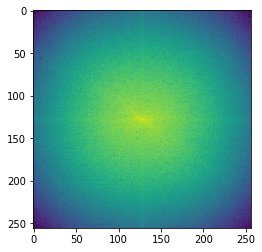

In [63]:
img_conv_dft = img_dft*gauss_2d
plt.imshow(np.log10(np.abs(img_conv_dft)))

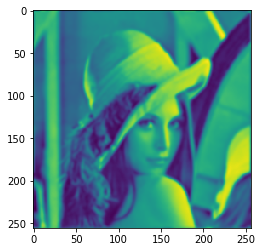

In [64]:
img_conv_idft = np.fft.fftshift(img_conv_dft)
img_conv_idft = np.fft.ifft2(img_conv_idft)
img_conv_idft = np.fft.fftshift(img_conv_idft)
plt.imshow(np.abs(img_conv_idft))

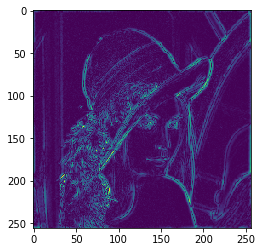

In [65]:
diff_conv = img - np.abs(img_conv_idft)
plt.imshow(np.abs(diff_conv))

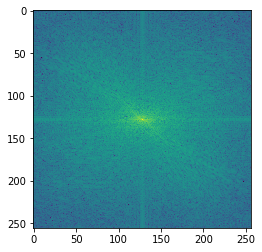

In [66]:
img_deconv_dft = img_conv_dft/gauss_2d
plt.imshow(np.log10(np.abs(img_deconv_dft)))

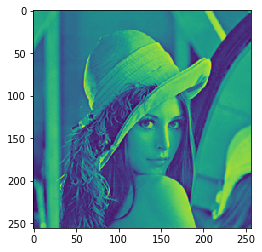

In [67]:
img_deconv_idft = np.fft.fftshift(img_deconv_dft)
img_deconv_idft = np.fft.ifft2(img_deconv_idft)
img_deconv_idft = np.fft.fftshift(img_deconv_idft)
plt.imshow(np.abs(img_deconv_idft))

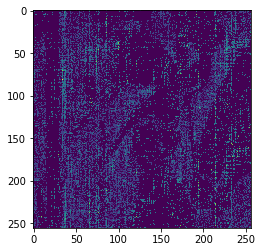

In [68]:
diff_deconv = np.abs(img - np.abs(img_deconv_idft))
plt.imshow(np.abs(diff_deconv))